This are the angles for the controlled-U gates:
Controlled-U 0 >>>  Rotation-angle: 2 π / 3
Controlled-U 1 >>>  Rotation-angle: 4 π / 3
Controlled-U 2 >>>  Rotation-angle: 8 π / 3
Controlled-U 3 >>>  Rotation-angle: 16 π / 3
Controlled-U 4 >>>  Rotation-angle: 32 π / 3
----------------------------------------------------------------------------------


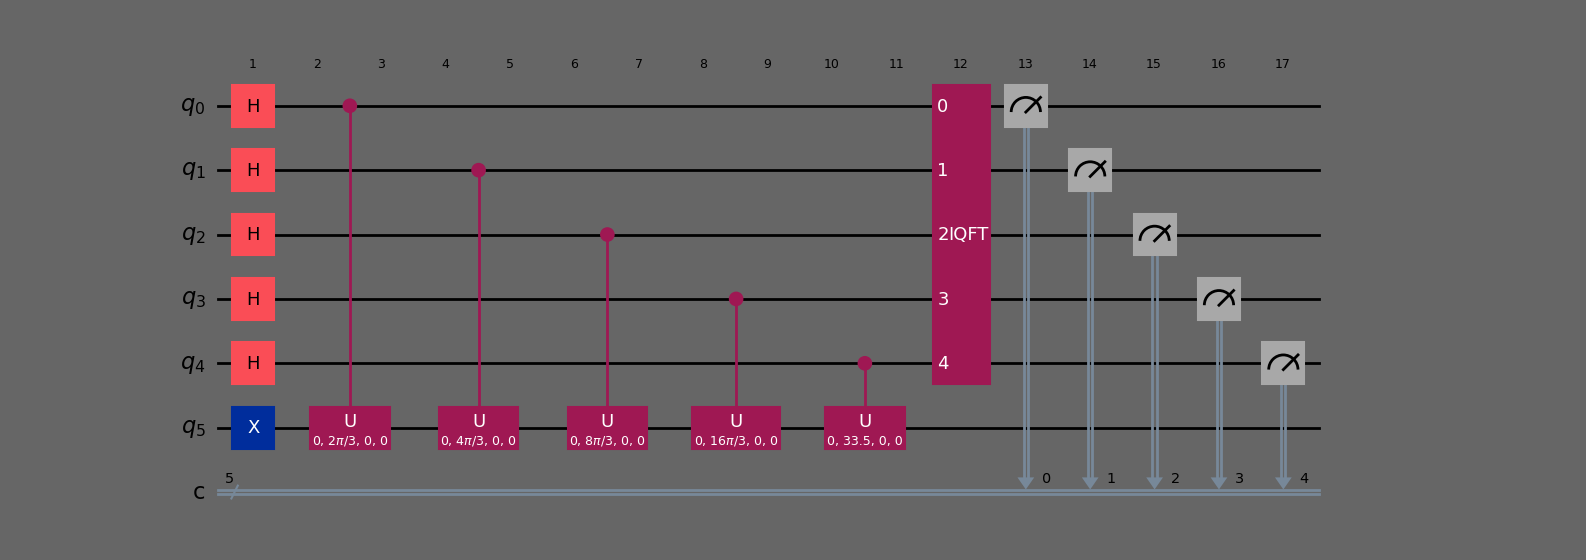

In [39]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math
from qiskit.circuit.library import QFT

# importing the style for the circuit from local *.py file.
import sys
sys.path.append('C:/Users/Gustavo_Porcilio/ALGORITHMS/Doc_help')
from circuit_style import style

# Five qubits for the counting register and one 
#qubit for the eigenstate |psi>
nQubits = 6

qpe = QuantumCircuit(nQubits, nQubits-1)

# H-Gates to control qubits:
for qubit in range(nQubits-1):
    qpe.h(qubit)

# Eigenstate |psi>:
qpe.x(nQubits-1)

# Controlled-U angles (theta) for qubits in descending order:
denominator = 3
angle = 2*math.pi/denominator

print("This are the angles for the controlled-U gates:")
for control_qubit in range(nQubits-1):

    print("Controlled-U", control_qubit, ">>>  Rotation-angle:", 2**(control_qubit+1),  "\u03C0 /", denominator)
    qpe.cu(0, angle, 0, 0, control_qubit, nQubits-1);
    angle *= 2

print("----------------------------------------------------------------------------------")

qpe.append(QFT(nQubits-1, inverse=True), range(nQubits-1))

for n in range(nQubits-1):
    qpe.measure(n,n)

qpe.draw(style=style, output="mpl")

{0: 0.0009765625, 1: 0.0009765625, 2: 0.0009765625, 3: 0.0009765625, 4: 0.0009765625, 5: 0.0048828125, 6: 0.0068359375, 7: 0.005859375, 8: 0.005859375, 9: 0.0244140625, 10: 0.166015625, 11: 0.6787109375, 12: 0.0498046875, 13: 0.01953125, 14: 0.005859375, 15: 0.00390625, 16: 0.00390625, 17: 0.00390625, 18: 0.0029296875, 20: 0.0009765625, 21: 0.0029296875, 22: 0.0009765625, 24: 0.0009765625, 25: 0.0009765625, 26: 0.001953125, 29: 0.0009765625, 30: 0.0029296875}
----------------------------------------------------------------
Binary Counts >>> {'000': 0.0009765625, '001': 0.0009765625, '010': 0.0009765625, '011': 0.0009765625, '100': 0.0009765625, '101': 0.0048828125, '110': 0.0068359375, '111': 0.005859375, '1000': 0.005859375, '1001': 0.0244140625, '1010': 0.166015625, '1011': 0.6787109375, '1100': 0.0498046875, '1101': 0.01953125, '1110': 0.005859375, '1111': 0.00390625, '10000': 0.00390625, '10001': 0.00390625, '10010': 0.0029296875, '10100': 0.0009765625, '10101': 0.0029296875, '1011

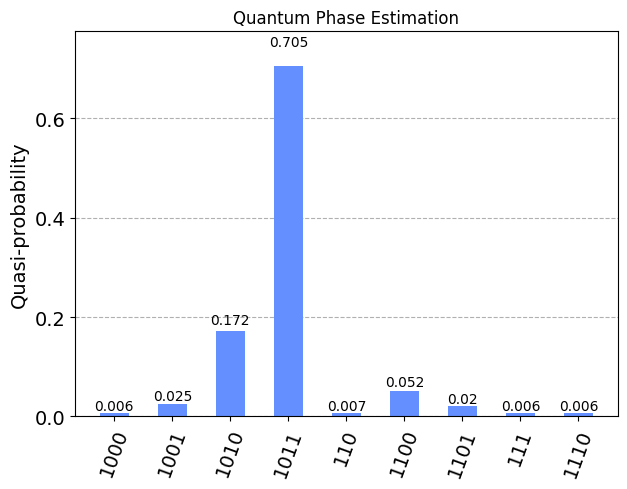

In [40]:
# Run a simulation with Sampler
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler

shots = 1024

# ***With a short line of code***
# Sampler().run(qc).result().quasi_dists[0]
sampler = Sampler()
job = sampler.run(qpe, shots=shots)

# Get the result
result = job.result()
probabilities = result.quasi_dists[0]

# Calculate the counts for each result
counts = {key: round(value * shots) for key, value in probabilities.items()}

print(probabilities)
print("----------------------------------------------------------------")

# Convert keys from decimal to binary
binary_key_counts = {format(key, '03b'): value for key, value in probabilities.items()}

# Filter out keys with a count less than 0.005 for better visibility
filtered_counts = {key: value for key, value in binary_key_counts.items() if value >= 0.005}

print("Binary Counts >>>", binary_key_counts)
print("----------------------------------------------------------------")
print("Filtered Counts >>>", filtered_counts)

# Plot the results
plot_histogram(filtered_counts, title="Quantum Phase Estimation")

The two most likely measurements are now `01011` (decimal 11) and `01010` (decimal 10). Measuring these results would tell us $\theta$ is:

$$
\theta = \frac{11}{2^5} = 0.344,\;\text{  or  }\;\; \theta = \frac{10}{2^5} = 0.313
$$

These two results differ from $\frac{1}{3}$ = 0,3333... by 3% and 6% respectively. A much better precision!

In [41]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

# Get the provider
backend = service.least_busy(simulator=False)

In [42]:
backend.status().to_dict()

{'backend_name': 'ibm_kyoto',
 'backend_version': '',
 'operational': True,
 'pending_jobs': 0,
 'status_msg': 'active'}

In [43]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(qpe)

from qiskit_ibm_runtime import SamplerV2 as Sampler
 
sampler = Sampler(backend=backend)

In [44]:
# Run the circuit on real hardware.
# Commented out to avoid running on real hardware twice.

# job = sampler.run([isa_circuit])

In [52]:
saved_job = job

In [ ]:
# isa_circuit.draw(style=style, output="mpl", scale=0.05) # Too big to display.

In [51]:
# Call the job from IBM Quantum Runtime already saved.
job = service.job("cs984z37yykg0082jx7g")

In [47]:
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d032c2ba-933e-4285-b039-9cbefebf9252
>>> Job Status: JobStatus.DONE


Filtered Probabilities >>> {'01001': 0.034423828125, '00001': 0.054931640625, '01101': 0.03369140625, '11111': 0.04736328125, '10111': 0.048095703125, '10101': 0.05322265625, '00011': 0.0458984375, '11101': 0.06591796875, '11001': 0.126953125, '11011': 0.0849609375, '00101': 0.040771484375}


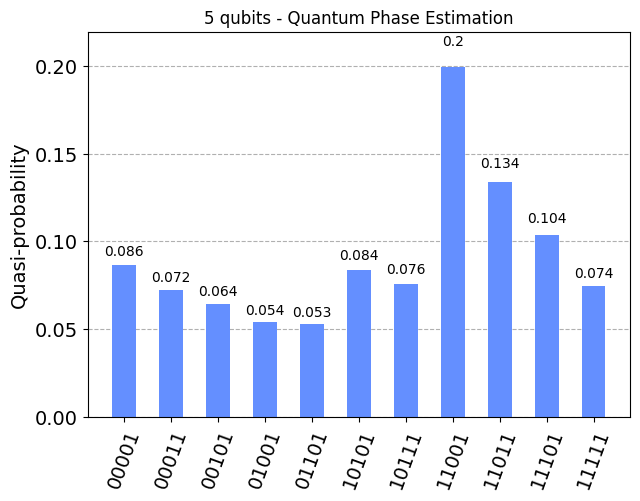

In [53]:
result = job.result()[0].data.c

counts = result.get_counts()

total_shots = sum(counts.values())

probabilities = {bitstring: count / total_shots for bitstring, count in counts.items()}
# print("Probabilities in every output >>>", probabilities)

# plot_histogram(probabilities, title="5 qubits - Quantum Phase Estimation")

filtered_prob = {key: value for key, value in probabilities.items() if value >= 0.033}
print("Filtered Probabilities >>>", filtered_prob)

plot_histogram(filtered_prob, title="5 qubits - Quantum Phase Estimation")

Hopefully we can see that the most likely result is "11001", which is the result we would expect from the simulator. Unlike the simulator, there is a possibility of measuring something other than "11001", this is due to noise and gate errors in the quantum computer.
- It should be noted that the rest of the measurements with much lower probability were filtered to clearly see the graph.

In [55]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.version.get_version_info()

'0.23.0'